In [ ]:
# How likely is it that a victim is murder by the same gender? 
#use data on weapons
#ethnicity
#race
#relationship 
#age 
#sex
# of offenders and victims



In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import csv
import time
import os

from pprint import pprint

# Import DATA.GOV API key
from api_keys import ld_dg_key

# Output File (CSV)
output_data_file = "output_data/fbi_crime_data.csv"


In [ ]:
#Data grab from the FBI victim API at  https://crime-data-explorer.fr.cloud.gov/api

age_query = "https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/homicide/victim/national/age?api_key="+ ld_dg_key
age_response = requests.get(age_query).json()

ethnicity_query = "https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/homicide/victim/national/ethnicity?api_key=" + ld_dg_key
eth_response = requests.get(ethnicity_query).json()

sex_query = "https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/homicide/victim/national/sex?api_key=" + ld_dg_key
sex_response = requests.get(sex_query).json()

race_query = "https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/homicide/victim/national/race?api_key=" + ld_dg_key
race_response = requests.get(race_query).json()

relationship_query = "https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/homicide/victim/national/relationship?api_key=" + ld_dg_key
rel_response = requests.get(relationship_query).json()


In [ ]:
# State Abbreviations

In [28]:
#Pull all pages for the data for each state 
state_qry ="https://api.usa.gov/crime/fbi/sapi/api/states?api_key=" + ld_dg_key
state_results_1 = requests.get(state_qry, params={'page':0}).json()
state_results_2 = requests.get(state_qry, params={'page':1}).json()
state_results_3 = requests.get(state_qry, params={'page':2}).json()

 #Make DFs for each page of data
sr1_df = pd.DataFrame(state_results_1['results'])
sr2_df = pd.DataFrame(state_results_2['results'])
sr3_df = pd.DataFrame(state_results_3['results'])

# Setting up a sleep command.
time.sleep(5)

#Combine DFs of each page into one DF for all data
state_data = pd.concat([sr1_df, sr2_df, sr3_df])

state_data.head()

,region_code,state_abbr,state_fips_code,state_id,state_name
0,4,AK,2.0,1,Alaska
1,3,AL,1.0,2,Alabama
2,3,AR,5.0,3,Arkansas
3,99,AS,60.0,4,American Samoa
4,4,AZ,4.0,5,Arizona


In [35]:
test_query = "https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/homicide/offense/states/TN/count?api_key="  + ld_dg_key

test_response = requests.get(test_query).json()
test_response
               

{'results': [{'incident_count': 16, 'offense_count': 17, 'data_year': 1997},
  {'incident_count': 80, 'offense_count': 86, 'data_year': 1998},
  {'incident_count': 124, 'offense_count': 134, 'data_year': 1999},
  {'incident_count': 293, 'offense_count': 314, 'data_year': 2000},
  {'incident_count': 388, 'offense_count': 419, 'data_year': 2001},
  {'incident_count': 390, 'offense_count': 426, 'data_year': 2002},
  {'incident_count': 378, 'offense_count': 397, 'data_year': 2003},
  {'incident_count': 339, 'offense_count': 356, 'data_year': 2004},
  {'incident_count': 393, 'offense_count': 431, 'data_year': 2005},
  {'incident_count': 399, 'offense_count': 419, 'data_year': 2006},
  {'incident_count': 393, 'offense_count': 405, 'data_year': 2007},
  {'incident_count': 393, 'offense_count': 412, 'data_year': 2008},
  {'incident_count': 444, 'offense_count': 468, 'data_year': 2009},
  {'incident_count': 340, 'offense_count': 358, 'data_year': 2010},
  {'incident_count': 361, 'offense_count'

In [24]:
# # Pull the sex of the offender by date and year.
# sex_query_url = "https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/homicide/offender/national/sex?api_key=" + ld_dg_key

# sex_response = requests.get(sex_query_url).json()
# # print(sex_query_url)

# sex_data = pd.DataFrame(sex_response["results"])
# sex_data = sex_data.sort_values(by="data_year", ascending=False)

# #Setting up a sleep command
# time.sleep(5)

# sex_data

In [16]:
#Opened an empty list to initialize a dataframe

empty_list = []

sexdf = pd.DataFrame(empty_list)

#Creating column on list based on the returned

sexdf["State"] = ""
sexdf["Year"] = ""
sexdf["Female Count"] = ""
sexdf["Male Count"] = ""
sexdf["Unknown"] = ""


#This is the loop to fill the dataframe.  This should work for any of us pulling the data from the FBI
#state APIs, with just tweaking the url, keyword and return information.

#The loop stores the return results for an individual state.  Then it loops through the return results to 
#populate each row in the empty dataframe created before.  Once it has looped through all of the return info,
#it goes back to the beginning and does the same for the next state in states.

#I found the "dataframe.append" bit on a website and it turned out to be the key to filling in the dataframe
#because it ignores index numbers and just appends to the next empty row available.

for i in states:
    
    state = i 
    
sex_query_url = "https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/homicide/offender/national/sex?api_key=" + ld_dg_key
sex_response_state = requests.get(sex_query_url).json()

for i in sex_response_state["results"]:

    sexdf = sexdf.append({"State":i["state"],
                     "Year": i["data_year"],
                     "Female Count": i["female count"],
                     "Male Count": i["male_count"],
                     "Unknown" : i["unknown"]},
                         ignore_index = True)
                         
                     
                                     

    
#setting up a sleep command
time.sleep(5)

    
sex_data

NameError: name 'state_name' is not defined

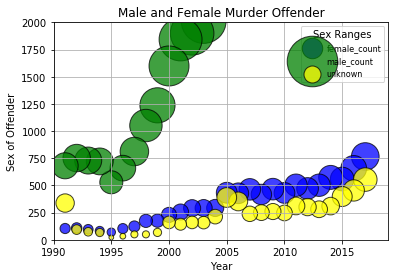

In [23]:
year = sex_data['data_year']
range0 = sex_data['female_count']
range1 = sex_data['male_count']
range2 = sex_data['unknown']


plt.scatter(year, range0, marker="o", facecolors="blue", edgecolors="black", alpha=0.75, label='female_count',s=range0)
plt.scatter(year, range1, marker="o", facecolors="green", edgecolors="black", alpha=0.75, label='male_count', s=range1) 
plt.scatter(year, range2, marker="o", facecolors="yellow", edgecolors="black", alpha=0.75, label='unknown', s=range2) 
 
 

#Incorporate the other graph properties
plt.grid()

plt.xlim(left=1990, right=2019)
plt.ylim(bottom=0, top=2000)

plt.xlabel("Year")
plt.ylabel("Sex of Offender")
plt.title("Male and Female Murder Offender")

#Create a legend
plt.legend(fontsize = 8, title= "Sex Ranges", loc="best") 

#Save Figure
plt.savefig("NumberofDeath.png", bbox_inches="tight")

#Show plot
plt.show()

In [16]:
#Pull the sex of the victim by date and year
sex_query_url ="https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/homicide/victim/national/sex?api_key=" + ld_dg_key

sex_response = requests.get(sex_query_url).json()

sex_data = pd.DataFrame(sex_response["results"])
sex_data = sex_data.sort_values(by="data_year", ascending=False)

#Setting up a sleep command
time.sleep(5)

sex_data


,data_year,female_count,male_count,unknown
12,2017,1215,3799,22
5,2016,1170,3545,23
21,2015,1063,3129,15
20,2014,918,2643,23
17,2013,910,2621,13
11,2012,946,2763,11
1,2011,904,2619,13
18,2010,909,2510,9
4,2009,863,2579,8
0,2008,773,2449,28


In [31]:
# female_count = female_countdf["victim"].sum()
# male_count = male_countdf["victim"].sum()
# unknown = unknowndf["victim"].sum()

#Pie Chart
labels = ["female_count", "male_count", "unknown"]
murder = [female_count, male_count, unknown]
colors =[red, blue, gold]
explode = (.1, 0, 0)
plt.pie(murder,labels=labels, colors=colors, explode=explode, autopct="%1.1f%%",startangle=90, shadow=True)

plt.title("Male and Female Victim")

#Save and Show
plt.savefig()
plt.show("VictimDeath.png")

NameError: name 'female_count' is not defined

In [10]:
#Data of murder that was committed 1991-2017
count_query_url = "https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/homicide/offender/national/count?api_key=" + ld_dg_key

count_response = requests.get(count_query_url).json()

count_data = pd.DataFrame(count_response["results"])
count_data = count_data.sort_values(by="data_year", ascending=False)

#Setting up a sleep command
time.sleep(5)

count_data

,count,data_year
12,6575,2017
5,6019,2016
21,5500,2015
20,4816,2014
17,4619,2013
11,4773,2012
1,4667,2011
18,4551,2010
4,4569,2009
0,4331,2008


In [5]:
# Pull the age data of victim by age and year.
age_query_url = "https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/homicide/victim/national/age?api_key=" + ld_dg_key

age_response = requests.get(age_query_url).json()

age_data = pd.DataFrame(age_response["results"])
age_data = age_data.sort_values(by="data_year", ascending=False)


#Setting up a sleep command
time.sleep(5)

age_data

,data_year,range_0_9,range_10_19,range_20_29,range_30_39,range_40_49,range_50_59,range_60_69,range_70_79,range_80_89,range_90_99,unknown
12,2017,210,509,1547,1062,681,536,259,94,55,12,71
5,2016,204,415,1548,992,615,496,244,111,48,13,52
21,2015,210,388,1324,892,523,446,205,108,44,10,57
20,2014,208,302,1076,695,526,377,204,97,41,10,48
17,2013,170,328,1077,728,487,382,176,90,38,12,56
11,2012,180,351,1165,733,499,441,167,84,42,6,52
1,2011,191,334,1097,700,536,341,165,66,49,10,47
18,2010,171,344,1074,677,479,332,181,72,47,5,46
4,2009,168,371,995,686,519,331,166,81,43,11,79
0,2008,181,352,963,644,483,305,116,61,40,8,97


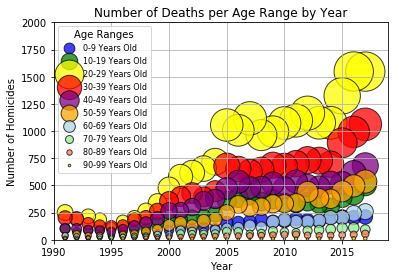

In [6]:
year = age_data['data_year']
range0 = age_data['range_0_9']
range1 = age_data['range_10_19']
range2 = age_data['range_20_29']
range3 = age_data['range_30_39']
range4 = age_data['range_40_49']
range5 = age_data['range_50_59']
range6 = age_data['range_60_69']
range7 = age_data['range_70_79']
range8 = age_data['range_80_89']
range9 = age_data['range_90_99']

plt.scatter(year, range0, marker="o", facecolors="blue", edgecolors="black", alpha=0.75, label='0-9 Years Old' ,s=range0)
plt.scatter(year, range1, marker="o", facecolors="green", edgecolors="black", alpha=0.75, label='10-19 Years Old', s=range1) 
plt.scatter(year, range2, marker="o", facecolors="yellow", edgecolors="black", alpha=0.75, label='20-29 Years Old', s=range2) 
plt.scatter(year, range3, marker="o", facecolors="red", edgecolors="black", alpha=0.75, label='30-39 Years Old', s=range3) 
plt.scatter(year, range4, marker="o", facecolors="purple", edgecolors="black", alpha=0.75, label='40-49 Years Old', s=range4) 
plt.scatter(year, range5,  marker="o", facecolors="orange", edgecolors="black", alpha=0.75, label='50-59 Years Old', s=range5) 
plt.scatter(year, range6, marker="o", facecolors="lightblue", edgecolors="black", alpha=0.75, label='60-69 Years Old', s=range6) 
plt.scatter(year, range7, marker="o", facecolors="lightgreen", edgecolors="black", alpha=0.75, label='70-79 Years Old', s=range7) 
plt.scatter(year, range8, marker="o", facecolors="coral", edgecolors="black", alpha=0.75, label='80-89 Years Old', s=range8) 
plt.scatter(year, range9, marker="o", facecolors="gold", edgecolors="black", alpha=0.75, label='90-99 Years Old', s=range9) 


#Incorporate the other graph properties
plt.grid()

plt.xlim(left=1990, right=2019)
plt.ylim(bottom=0, top=2000)

plt.xlabel("Year")
plt.ylabel("Number of Homicides")
plt.title("Number of Deaths per Age Range by Year")

#Create a legend
plt.legend(fontsize = 8, title= "Age Ranges", loc="best") 

#Save Figure
plt.savefig("NumberofDeath.png", bbox_inches="tight")

#Show plot
plt.show()

In [22]:
# File to load
dataPath = 'C:/Users/Leah/Downloads/weapons.csv'

# Read the Data
dataPath=pd.read_csv(dataPath)
# dataPath=dataPath[['Total murders','Handguns','Rifles','Shotguns',]]
                   
                
                   
dataPath.head()

,State,Total murders,firearms,Handguns,Rifles,Shotguns,Firearms type unknown,Knives or cutting instruments,Other weapons,"Hands, fists, feet, etc."
0,Alabama3,2,1,0,0,0,1,0,1,0
1,Alaska,62,37,7,3,3,24,13,8,4
2,Arizona,404,249,162,8,9,70,50,93,12
3,Arkansas,250,168,92,11,4,61,23,52,7
4,California,"1,830","1,274",886,37,34,317,258,195,103


In [ ]:
#API Call to National-level offender-data-controller for homicide only 
# 
#FORMAT:  https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/homicide/offender/national/{variable}?api_key=

age_query_url = "https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/homicide/offender/national/age?api_key=" + dg_key
count_query_url = "https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/homicide/offender/national/count?api_key=" + dg_key
ethnicity_query_url = "https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/homicide/offender/national/ethnicity?api_key=" + dg_key
sex_query_url = "https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/homicide/offender/national/sex?api_key=" + dg_key
race_query_url = "https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/homicide/offender/national/race?api_key=" + dg_key


OFF_age_response = requests.get(age_query_url).json()
OFF_count_response = requests.get(count_query_url).json()  
OFF_ethnicity_response = requests.get(ethnicity_query_url).json()
OFF_sex_response = requests.get(sex_query_url).json()
OFF_race_response = requests.get(race_query_url).json()

In [ ]:
pprint(relationship_response)

In [ ]:
dataPath = 'C:/Users/Leah/Downloads/weapons.csv'

In [ ]:
f = open(dataPath, 'r')

In [ ]:
reader = csv.reader(f)

In [ ]:
reader

In [ ]:
for line in reader:
    print(line)

In [ ]:
dataPath_pd = 'C:/Users/Leah/Downloads/weapons.csv'

In [ ]:
dataPath_pd = pd.read_csv(dataPath_pd)
dataPath_pd.head()